In [ ]:
from google.colab import files
data_to_load = files.upload()

Saving Cac40.csv to Cac40.csv


In [ ]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from warnings import filterwarnings
from datetime import *
from datetime import datetime 
from sklearn.metrics import mean_squared_error as mse
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

filterwarnings("ignore")

tab = pd.read_csv('Cac40.csv',usecols=['Date', 'Close'], index_col="Date",  parse_dates=['Date'])
Cac40=tab.squeeze()
#tab utlisé pour SARIMAX
Cac40=Cac40.dropna(axis=0,how='any')
#Tab utilisé pour LSTM
Cac40LSTM=tab.dropna(axis=0,how='any')

In [ ]:
#plot Cac40 tout court
def plot_cac40():
  plt.figure(figsize=(30,12))
  plt.plot(Cac40)
  plt.title("Prix Cloture (euro)",fontsize=20)
  plt.ylabel("Prix Unitaire")
  plt.xlabel("Année")
  plt.show()

In [ ]:
#plot SARIMAX prediction
def plot_cac40_pred(pred,title):
    plt.figure(figsize=(30,12))
    plt.plot(y_train,label='Entrainé')
    plt.plot(y_test,label='Test')
    plt.plot(pred,label='Prediction')
    plt.ylabel("Prix Cloture (euro)")
    plt.xlabel("Année")
    plt.title(title,fontsize=20)
    plt.legend()
    plt.show()

In [ ]:
#Calcul longueur à entrainer ( et du coup celle qui sert de test)
training_data_len = int(np.ceil( len(Cac40) * .8 ))
training_data_len

6192

In [ ]:
#Prediction utilisant SARIMAX
def sarimax_pred():
  y_train = Cac40.iloc[:training_data_len]
  y_test = Cac40.iloc[training_data_len:]
  sarima = SARIMAX(y_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 45),mle_regression=True)\
  .fit(disp=False)
  y_sarima = sarima.predict(6000,7738,typ='levels')
  y_sarima.index = y_test.index
  mse(y_sarima,y_test)

In [ ]:
#Prediction utilisant LSTM
def LSTM_pred():

  #Conversion du csv en matrice (7739, 1)
  close = Cac40LSTM.values
  

  #Normalisation des différentes données pour plus de précisions et de performances dans l'entrainement/prédicition
  scaler = MinMaxScaler(feature_range=(0,1))
  scaled_data = scaler.fit_transform(close)


  #Creation du Dataset et de son entrainement


  #Creation du Dataset voué uniquement à l'entrainement
  train_data = scaled_data[0:int(training_data_len), :]
  #Création des deux dataset x_train et y_train séparant le train_data en deux (pour contenir les données future pour la prédiction)
  x_train = []
  y_train = []

  for i in range(60, len(train_data)):
      x_train.append(train_data[i-60:i, 0])
      y_train.append(train_data[i, 0])
      


  # Convertion de x_train et y_train en numpy arrays pour pouvoir utiliser LSTM
  x_train, y_train = np.array(x_train), np.array(y_train)

  #Reshape du data
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


  #LSTM model
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
  model.add(LSTM(50, return_sequences= False))
  model.add(Dense(25))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')

  #Entrainement du model
  model.fit(x_train, y_train, batch_size=1, epochs=1)

  #Creation du Dataset servant à l'evalutaion de l'entraînement 
  test_data = scaled_data[training_data_len - 60: , :]
  #Création des deux dataset x_test et y_test séparant le test_data en deux
  x_test = []
  for i in range(60, len(test_data)):
      x_test.append(test_data[i-60:i, 0])
  y_test = close[training_data_len:, :]
      
  # Convertion numpy array
  x_test = np.array(x_test)

  # Reshape du  data
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

  # Evaluation et récuperation du jeu de donée prédites
  global predictions 
  predictions = model.predict(x_test)
  #transforamtion inverse pour avoir des données compréhensible par tous le monde
  predictions = scaler.inverse_transform(predictions)

  # récupération de la racine c&rrée du précédent (RMSE) pour voir le taux d'erreur
  rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
  rmse

In [ ]:
def plotGen_cac40LSTM_pred():
  # Plot du dataset
  train = Cac40LSTM[:training_data_len]
  valid = Cac40LSTM[training_data_len:]
  valid['Predictions'] = predictions
  # Viqualisation du dataset
  plt.figure(figsize=(30,20))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Prix Cloture (euro)', fontsize=18)
  plt.plot(train['Close'])
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
  plt.show()

In [ ]:
def plotPartResult_cac40LSTM_pred():
  # Plot du dataset
  train = Cac40LSTM[:training_data_len]
  valid = Cac40LSTM[training_data_len:]
  valid['Predictions'] = predictions
  # Viqualisation du dataset
  plt.figure(figsize=(30,15))
  plt.title('Model')
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Prix Cloture (euro)', fontsize=18)
  plt.plot(valid[['Close', 'Predictions']])
  plt.legend(['Val', 'Predictions'], loc='lower right')
  plt.show()


    #######################################################################
    #                                        MENU                         #
    # 1. Afficher Cac40                                                   #
    # 2.SARIMAX Prediction                                                #
    # 3.LSTM Prediction                                                   #
    # 4.Exit/Quit                                                         #
    #######################################################################
    

    
Que voulez vous faire :1

CAC40


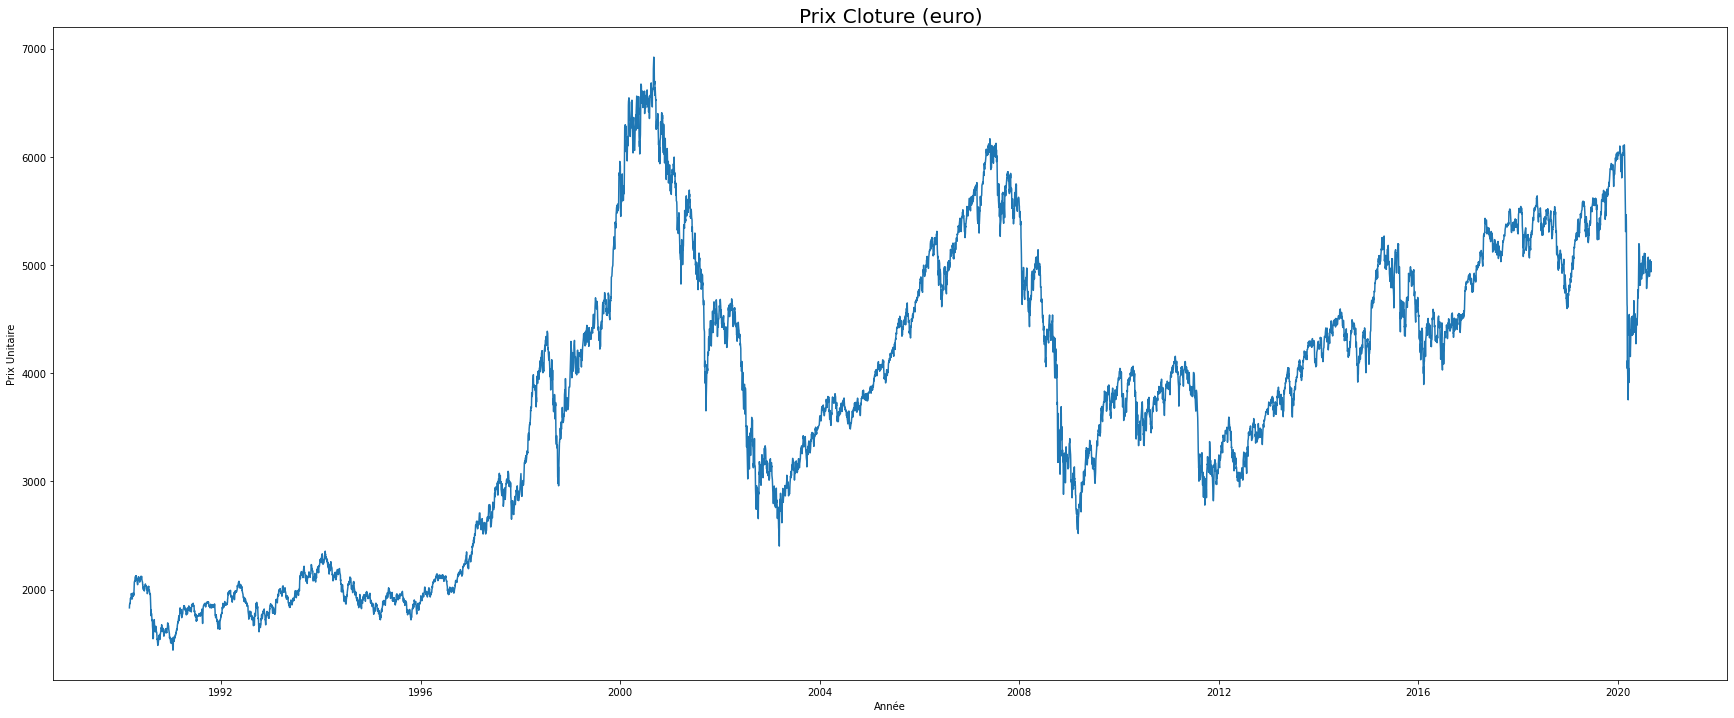


 Not Valid Choice Try again

    #######################################################################
    #                                        MENU                         #
    # 1. Afficher Cac40                                                   #
    # 2.SARIMAX Prediction                                                #
    # 3.LSTM Prediction                                                   #
    # 4.Exit/Quit                                                         #
    #######################################################################
    

    


KeyboardInterrupt: ignored

In [ ]:
#MENU
ans=True
while ans:
    print("""
    #######################################################################
    #                                        MENU                         #
    # 1. Afficher Cac40                                                   #
    # 2.SARIMAX Prediction                                                #
    # 3.LSTM Prediction                                                   #
    # 4.Exit/Quit                                                         #
    #######################################################################
    \n
    """)
    ansBis= input("Que voulez vous faire :")
    if ansBis=="1":
      print("\nCAC40")
      plot_cac40()
      ans=True
    if ansBis=="2":
      print("\nSARIMAX Prediction")
      sarimax_pred()
      plot_cac40_pred(y_sarima,"SARIMAX PREDICTION")
      ans=True
    elif ansBis=="3":
      print("\n LSTM Prediction")
      LSTM_pred()
      ansBis= input("Voulez vous le résultat global (1), ou uniquement la partie résultat (2) :")
      if ansBis=="1":
        plot_cac40LSTM_pred()      
      elif ansBis=="2":
        plotPartResult_cac40LSTM_pred()
      ans=True
    elif ansBis=="4":
      print("\n Goodbye") 
      ans = None
    else:
       print("\n Not Valid Choice Try again")
       ans=True 